# Importing all Regressors and required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor

In [2]:
store = pd.read_csv("stores_wall.csv")
train = pd.read_csv("train_wall.csv")
features = pd.read_csv("features_wall.csv")

In [3]:
stotures = pd.merge(features,store, on="Store", how='inner')

In [4]:
combine = pd.merge(train,stotures)
combine

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2/5/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2/5/2010,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2/5/2010,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2/5/2010,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2/5/2010,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,10/26/2012,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421566,45,94,10/26/2012,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421567,45,95,10/26/2012,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421568,45,97,10/26/2012,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221


In [5]:
experiment = pd.merge(train,stotures)

In [6]:
combine.Date = pd.to_datetime(combine.Date)
combine['Week'] = combine.Date.dt.week 
combine

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,43
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,43
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,43
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,43


In [1]:
combine = combine.drop(columns=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','Temperature','CPI','Unemployment','Fuel_Price','Date'],errors='ignore')
lb = LabelEncoder()
combine['Type'] = lb.fit_transform(combine['Type'])
combine

NameError: name 'combine' is not defined

In [8]:
X = combine.drop("Weekly_Sales", axis=1)
y = combine["Weekly_Sales"]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.3,random_state=34)

# Linear Regression

In [10]:
lr = LinearRegression()
lr.fit(X_train,y_train)
prediction = lr.predict(X_test)
rms_lr = np.sqrt(mean_squared_error(y_test, prediction))
rms_train = np.sqrt(mean_squared_error(y_train, lr.predict(X_train)))
print(rms_lr)
print("----------------------------------------------")
print("Lets Check if Over or Under Fitting")
print("----------------------------------------------")
print(rms_train)

21763.47263616149
----------------------------------------------
Lets Check if Over or Under Fitting
----------------------------------------------
21698.787725052003


## A little touch of Regularization

In [11]:
lrr_ridge = Ridge(alpha=120).fit(X_train, y_train)
prediction = lrr_ridge.predict(X_test)
rms_lr_rg = np.sqrt(mean_squared_error(y_test, prediction))
print(rms_lr_rg)

21763.381994651118


# What a Polynomial Feature can do!!!!

[21763.47263616149, 20420.245637291526, 19839.87232054651, 19623.869300592305]
----------------------------------------------
Lets Check if Over or Under Fitting
----------------------------------------------
[21698.787725052003, 20355.109219829566, 19741.263909939084, 19516.023103709977]


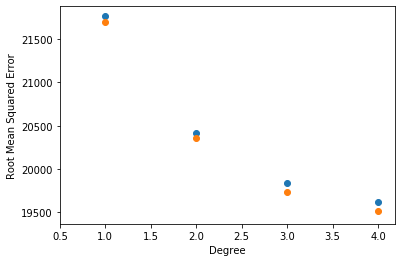

In [14]:
rms_py = []
rms_train1 = []
for x in range(1,5):
    poly = PolynomialFeatures(degree = x) 
    X_poly = poly.fit_transform(X_train) 
    poly.fit(X_poly, y_train) 
    lr2 = LinearRegression() 
    lr2.fit(X_poly, y_train)
    prediction = lr2.predict(poly.fit_transform(X_test))
    rms = np.sqrt(mean_squared_error(y_test, prediction))
    rms_py.append(rms)
    rms_train = np.sqrt(mean_squared_error(y_train, lr2.predict(poly.fit_transform(X_train))))
    rms_train1.append(rms_train)
print(rms_py)
print("----------------------------------------------")
print("Lets Check if Over or Under Fitting")
print("----------------------------------------------")
print(rms_train1)
plt.figure()
plt.xlabel('Degree')
plt.ylabel('Root Mean Squared Error')
plt.scatter(range(1,5), rms_py)
plt.scatter(range(1,5), rms_train1)
plt.xticks([0.5,1,1.5,2,2.5,3,3.5,4]);

# Decision Tree

In [15]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
prediction = dt.predict(X_test)
rms_dt = np.sqrt(mean_squared_error(y_test, prediction))
print(rms_dt)
rms_train = np.sqrt(mean_squared_error(y_train, dt.predict(X_train)))
print("----------------------------------------------")
print("Lets Check if Over or Under Fitting")
print("----------------------------------------------")
print(rms_train)

4750.303691904336
----------------------------------------------
Lets Check if Over or Under Fitting
----------------------------------------------
2184.3375041288064


In [21]:
dt = DecisionTreeRegressor(max_depth=24,min_samples_split=3,min_samples_leaf=4,random_state=42)
dt.fit(X_train,y_train)
prediction = dt.predict(X_test)
rms_dt_opt = np.sqrt(mean_squared_error(y_test, prediction))
print(rms_dt_opt) 
rms_train = np.sqrt(mean_squared_error(y_train, dt.predict(X_train)))
print("----------------------------------------------")
print("Lets Check if Over or Under Fitting")
print("----------------------------------------------")
print(rms_train)

4489.458991581719
----------------------------------------------
Lets Check if Over or Under Fitting
----------------------------------------------
3232.4125237576663


# Random Forest

In [16]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
predicton = rf.predict(X_test)
rms_rf = np.sqrt(mean_squared_error(y_test, prediction))
print(rms_rf)
print("----------------------------------------------")
rms_train = np.sqrt(mean_squared_error(y_train, rf.predict(X_train)))
print("Lets Check if Over or Under Fitting")
print("----------------------------------------------")
print(rms_train)

4750.303691904336
----------------------------------------------
Lets Check if Over or Under Fitting
----------------------------------------------
2358.22248893213


In [22]:
rf = RandomForestRegressor(max_depth=24, min_samples_split=3, min_samples_leaf=4,random_state=42)
rf.fit(X_train,y_train)
predicton = rf.predict(X_test)
rms_rf_opt = np.sqrt(mean_squared_error(y_test, prediction))
print(rms_rf_opt)
rms_train = np.sqrt(mean_squared_error(y_train, rf.predict(X_train)))
print("Lets Check if Over or Under Fitting")
print(rms_train)

4489.458991581719
Lets Check if Over or Under Fitting
3319.82525805006


# My Show Stopper

In [23]:
def my_error(combine, real, predicted):
    weights = []
    for x in range(126471):
        if combine.IsHoliday.any():
            weights.append(5)
        else:
            weights.append(1)
    return np.round(np.sum(weights*abs(real-predicted))/(np.sum(weights)), 2)
    #Just a mean absolute error with weight as a parameter multiplied

In [24]:
def my_error_train(combine, real, predicted):
    weights = []
    for x in range(421570-126471):
        if combine.IsHoliday.any():
            weights.append(5)
        else:
            weights.append(1)
    return np.round(np.sum(weights*abs(real-predicted))/(np.sum(weights)), 2)

# Introducing the power of analysis

In [25]:
lr = LinearRegression()
lr.fit(X_train,y_train)
prediction = lr.predict(X_test)
print("Last Result")
print(rms_lr)
print("----------------------------------------------")
print("Using my_error func")
print(my_error(combine, y_test, prediction))

Last Result
21763.47263616149
----------------------------------------------
Using my_error func
14556.4


Last Result
[21763.47263616149, 20420.245637291526, 19839.87232054651, 19623.869300592305]
----------------------------------------------
Using my_error func
[14556.4, 12840.62, 12237.06, 12070.58]


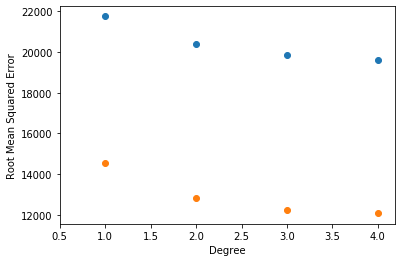

In [27]:
rms_new = []
for x in range(1,5):
    poly = PolynomialFeatures(degree = x) 
    X_poly = poly.fit_transform(X_train) 
    poly.fit(X_poly, y_train) 
    lr2 = LinearRegression() 
    lr2.fit(X_poly, y_train)
    prediction = lr2.predict(poly.fit_transform(X_test))
    rms = my_error(combine, y_test, prediction)
    rms_new.append(rms)
print("Last Result")
print(rms_py)
print("----------------------------------------------")
print("Using my_error func")
print(rms_new)
plt.figure()
plt.xlabel('Degree')
plt.ylabel('Root Mean Squared Error')
plt.scatter(range(1,5), rms_py)
plt.scatter(range(1,5), rms_new)
plt.xticks([0.5,1,1.5,2,2.5,3,3.5,4]);

In [34]:
dt = DecisionTreeRegressor(max_depth=24,min_samples_split=3,min_samples_leaf=4,random_state=42)
dt.fit(X_train,y_train)
prediction = dt.predict(X_test)
rms_dt_opt_new = my_error(combine, y_test, prediction)
rms_train = np.sqrt(mean_squared_error(y_train, dt.predict(X_train)))
rms_train_new = my_error_train(combine, y_train, dt.predict(X_train))
print("Last result")
print(rms_dt_opt)
print("----------------------------------------------")
print("Lets Check if Over or Under Fitting")
print("----------------------------------------------")
print(rms_train)
print("oooooooooooooooooooooooooooooooooooooooooooooooooooooooo")
print(rms_dt_opt_new)
print("----------------------------------------------")
print("Lets Check if Over or Under Fitting")
print("----------------------------------------------")
print(rms_train_new)

Last result
4489.458991581719
----------------------------------------------
Lets Check if Over or Under Fitting
----------------------------------------------
3232.4125237576663
oooooooooooooooooooooooooooooooooooooooooooooooooooooooo
1865.97
----------------------------------------------
Lets Check if Over or Under Fitting
----------------------------------------------
1366.1


In [30]:
rf = RandomForestRegressor(max_depth=24, min_samples_split=3, min_samples_leaf=4,random_state=42)
rf.fit(X_train,y_train)
predicton = rf.predict(X_test)
rms_rf_opt_new = my_error(combine, y_test, prediction)
rms_train = np.sqrt(mean_squared_error(y_train, dt.predict(X_train)))
rms_train_new = my_error_train(combine, y_train, dt.predict(X_train))
print("Last result")
print(rms_rf_opt)
print("----------------------------------------------")
print("Lets Check if Over or Under Fitting")
print("----------------------------------------------")
print(rms_train)
print("oooooooooooooooooooooooooooooooooooooooooooooooooooooooo")
print(rms_rf_opt_new)
print("----------------------------------------------")
print("Lets Check if Over or Under Fitting")
print("----------------------------------------------")
print(rms_train_new)

Last result
4489.458991581719
----------------------------------------------
Lets Check if Over or Under Fitting
----------------------------------------------
3232.4125237576663
oooooooooooooooooooooooooooooooooooooooooooooooooooooooo
1865.97
----------------------------------------------
Lets Check if Over or Under Fitting
----------------------------------------------
1366.1
